<a href="https://colab.research.google.com/github/Henry-P-Ding/yquantum-2025/blob/main/yquantum_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install QuantumRingsLib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00


In [16]:
!pip install qiskit==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.0
    Uninstalling qiskit-2.0.0:
      Successfully uninstalled qiskit-2.0.0


In [ ]:
!pip install quantumrings-toolkit-qiskit

In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRingsProvider

#Acquire the Quantum Rings Provider
provider = QuantumRingsProvider(
    token='rings-128.tFp5jv833mIYtWvhAcPilxZNHO0MGRw1',
    name='khang.tran@princeton.edu'
)
print("Account Name: ", provider.active_account()["name"], "\nMax Qubits: ", provider.active_account()["max_qubits"])


#Save the account locally.
provider.save_account(
    token='rings-128.tFp5jv833mIYtWvhAcPilxZNHO0MGRw1',
    name='khang.tran@princeton.edu')
print(provider.saved_accounts(False, "default"))

Account Name:  khang.tran@princeton.edu 
Max Qubits:  128
{'khang.tran@princeton.edu': 'rings-128.tFp5jv833mIYtWvhAcPilxZNHO0MGRw1'}


In [2]:
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np

backend = provider.get_backend("scarlet_quantum_rings")
shots = 1024

In [3]:
def iqft_cct(qc, b, n):
    """
    The inverse QFT circuit

    Args:

        qc (QuantumCircuit):
                The quantum circuit

        b (QuantumRegister):
                The target register

        n (int):
                The number of qubits in the registers to use

    Returns:
        None

    """

    for i in range (n):
        for j in range (1, i+1):
            # for inverse transform, we have to use negative angles
            qc.cu1(  -np.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        # the H transform should be done after the rotations
        qc.h(b[i])
    qc.barrier()
    return

def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

Job Running
Job Done.
Ending Job Monitor


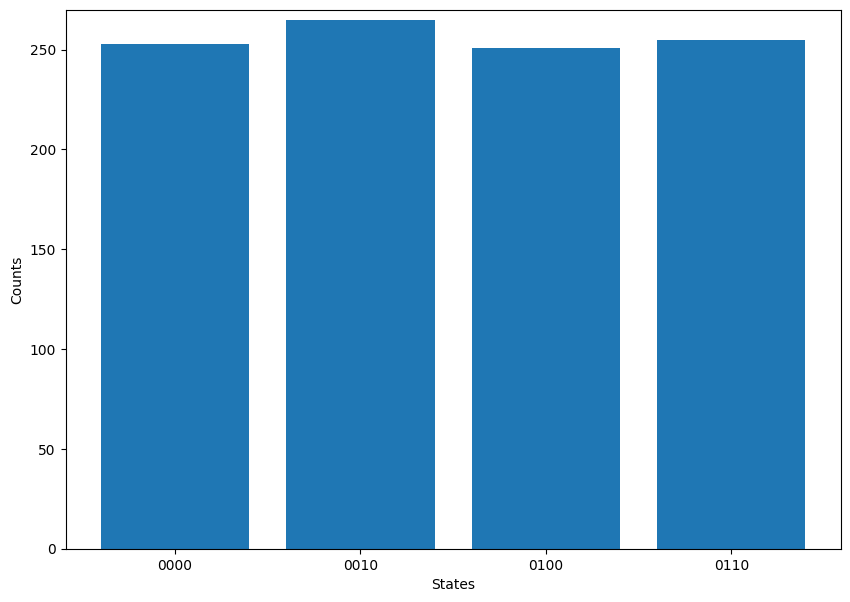

In [5]:
# Shor’s algorithm to factorize 15 using 7^x mod 15.
numberofqubits = 7
shots = 1024

q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(4 , 'c')
qc = QuantumCircuit(q, c)

# Initialize source and target registers
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(6)
qc.barrier()

# Modular exponentiation 7^x mod 15
qc.cx(q[2],q[4] )
qc.cx(q[2],q[5] )
qc.cx(q[6],q[4] )
qc.ccx(q[1],q[5],q[3] )
qc.cx(q[3],q[5] )
qc.ccx(q[1],q[4],q[6] )
qc.cx(q[6],q[4] ) #
qc.barrier()

# IQFT. Refer to implementation from earlier examples
iqft_cct (qc, q, 3)

# Measure
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# Execute the circuit
job = backend.run(qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()

#clean up
del q, c, qc
del result
del job

#visualize
plot_histogram(counts)

In [11]:
print(np.gcd(7**2 + 1, 15))
print(np.gcd(7**2 - 1, 15))

5
3
